In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [5]:
# Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [6]:
# Initializing the RNN
regressor = Sequential()

In [7]:
# Adding first LSTM layer and some regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [8]:
# Adding first LSTM layer and some regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [9]:
# Adding first LSTM layer and some regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [10]:
# Adding the output layer
regressor.add(Dense(units=1))

In [11]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
regressor.fit(x_train,y_train,epochs=100, batch_size=32)

W0514 18:23:56.181649 4518720960 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0418
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0057
Epoch 3/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0049
Epoch 4/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0046
Epoch 5/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0039
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0034
Epoch 12/100
1198/1198 [==============================] - 3s 2ms/step - lo

In [1]:
# Making the predictions and visualizing the results
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

NameError: name 'pd' is not defined

In [14]:
# Getting the predicted price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

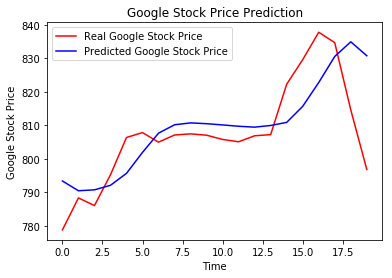

In [15]:
# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()